经典网络-AlexNet
===
# 1.网络结构
![images](Images/03/01/02_001.png)
根据keras的summary函数得到AlexNet网络参数统计图
![images](Images/03/01/02_002.png)
AlexNet在2012年ImageNet竞赛中以超过第二名10.9个百分点的绝对优势一举夺冠，从此深度学习和卷积神经网络名声鹊起，深度学习的研究如雨后春笋般出现，AlexNet的出现可谓是卷积神经网络的王者归来

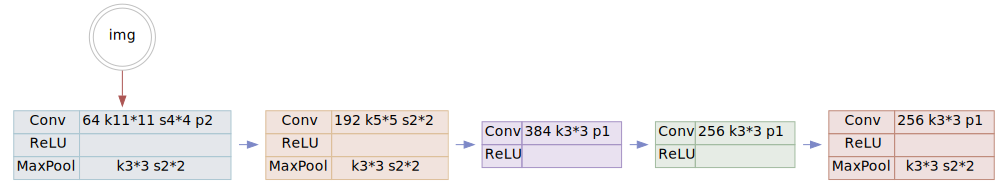

In [10]:
from graphviz import Digraph

import graphviz

FONT_NAME = "Fira Code Retina"
d = graphviz.Digraph(name="AlexNet", format='png',node_attr={'shape': 'plaintext'})
d.node('img', shape="doublecircle", color="grey", fontname=FONT_NAME)

with d.subgraph() as sub1:
    sub1.attr(rank="same")
    sub1.node("block1", '''<
    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
    <tr><td>Conv</td><td>64 k11*11 s4*4 p2</td></tr>
    <tr><td>ReLU</td><td></td></tr>
    <tr><td>MaxPool</td><td>k3*3 s2*2</td></tr>
    </table>
    >''', fontname=FONT_NAME)
    sub1.node("block2", '''<
    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
    <tr><td>Conv</td><td>192 k5*5 s2*2</td></tr>
    <tr><td>ReLU</td><td></td></tr>
    <tr><td>MaxPool</td><td>k3*3 s2*2</td></tr>
    </table>
    >''', fontname=FONT_NAME)
    sub1.node("block3", '''<
    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
    <tr><td>Conv</td><td>384 k3*3 p1</td></tr>
    <tr><td>ReLU</td><td></td></tr>
    </table>
    >''', fontname=FONT_NAME)
    sub1.node("block4", '''<
    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
    <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
    <tr><td>ReLU</td><td></td></tr>
    </table>
    >''', fontname=FONT_NAME)
    sub1.node("block5", '''<
    <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
    <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
    <tr><td>ReLU</td><td></td></tr>
    <tr><td>MaxPool</td><td>k3*3 s2*2</td></tr>
    </table>
    >''', fontname=FONT_NAME)
    sub1.edge('block1', 'block2', color="#7D88C7")
    sub1.edge('block2', 'block3', color="#7D88C7")
    sub1.edge('block3', 'block4', color="#7D88C7")
    sub1.edge('block4', 'block5', color="#7D88C7")
d.edge('img', 'block1', color="#AC5553")
d

AlexNet提出了四个最重要的技术
- 数据增广
- ReLU激活函数
- Dropout方法
- LRN

1. 因为使用多GPU训练，所以可以看到第一层卷积层后有两个完全一样的分支，以加速训练。
2. 图片在操作之前先做padding，padding到227.
3. 数据增广技巧来增加模型泛化能力
4. 用ReLU代替Sigmoid来加快SGD的收敛速度

## 1.1.Dropout
Dropout原理类似于浅层学习算法的中集成算法，该方法通过让全连接层的神经元（该模型在前两个全连接层引入Dropout）以一定的概率失去活性（比如0.5）失活的神经元不再参与前向和反向传播

相当于约有一半的神经元不再起作用。在测试的时候，让所有神经元的输出乘0.5。Dropout的引用，有效缓解了模型的过拟合。

## 1.2.LRN
Local Responce Normalization局部响应归一层的基本思路是，假如这是网络的一块，比如是 13×13×256，LRN 要做的就是选取一个位置，比如说这样一个位置，从这个位置穿过整个通道,能得到 256 个数字，并进行归一化。进行局部响应归一化的动机是，对于这张 13×13 的图像中的每个位置来说，我们可能并不需要太多的高激活神经元。但是后来，很多研究者发现 LRN 起不到太大作用，因为并不重要，而且我们现在并不用 LRN 来训练网络。
$$
b_{x,y}^i = \frac{a^i_{x,y}}{(k+\alpha\sum^{min(N-1,i+n/2)}\_{j=max(0,i-n/2)}(a^j_{x,y})^2)^\beta}
$$

